<a href="https://colab.research.google.com/github/pras-4795/AIMLColab/blob/master/dance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
df = pd.read_csv('/content/drive/My Drive/Dance/dataset/train.csv')

In [3]:
df['target'].unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [0]:
X = []
Y = []

In [0]:
for index, row in df.iterrows():
  p = os.path.join('/content/drive/My Drive/Dance/dataset/train', row['Image'])
  X.append(cv2.imread(p))
  Y.append(row['target'])

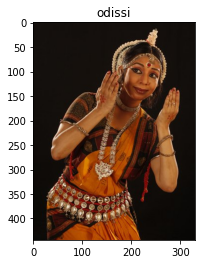

In [7]:
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(cv2.cvtColor(X[2], cv2.COLOR_BGR2RGB))
plt.title(Y[2])
plt.show()

In [37]:
for i,x in enumerate(X):
  X[i] = x/255

ValueError: ignored

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [47]:
Y[0]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Dance')

In [55]:
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, MaxPooling2D, Dense
import SpatialPyramidPooling

ModuleNotFoundError: ignored